In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [95]:
data = pd.read_csv('Datasets/Data_RemoveOutliers')

In [96]:
data.head()
# data.shape

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,FWI,Classes
0,29,57,18,0.00,65.7000,3.4,7.6,1.3,0.5,0
1,29,61,13,1.25,64.4000,4.1,7.6,1.0,0.4,0
2,26,82,22,1.25,47.7375,2.5,7.1,0.3,0.1,0
3,25,89,13,1.25,47.7375,1.3,6.9,0.0,0.0,0
4,27,77,16,0.00,64.8000,3.0,14.2,1.2,0.5,0


#### Taking x and y values:

In [97]:
x = data.drop(['FWI', 'Classes'], axis=1)

In [98]:
y = data['FWI']

#### Train-Test split():

In [99]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.25, random_state=42)

In [100]:
x_train.shape

(183, 8)

#### Feature Scaling:

In [101]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [102]:
x_train = scaler.fit_transform(x_train)

In [103]:
x_test = scaler.transform(x_test)

In [104]:
import pickle
pickle.dump(scaler, open('Scaler_Transformed.pkl', 'wb'))

### Regression Models:

#### Linear Regression:

In [105]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(x_train, y_train)

LinearRegression()

#### Ridge Regression:


In [106]:
from sklearn.linear_model import Ridge
ridge_model = Ridge()
ridge_model.fit(x_train, y_train)

Ridge()

#### Lasso Regression:

In [107]:
from sklearn.linear_model import Lasso
lasso_model = Lasso()
lasso_model.fit(x_train, y_train)

Lasso()

#### KNN Regression:

In [108]:
from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor()
knn_model.fit(x_train, y_train)

KNeighborsRegressor()

#### SVM Regressor:

In [109]:
from sklearn.svm import SVR
svm_model = SVR()
svm_model.fit(x_train, y_train)

SVR()

#### Decision Tree Regression:

In [110]:
from sklearn.tree import DecisionTreeRegressor
tree_model = DecisionTreeRegressor()
tree_model.fit(x_train, y_train)

DecisionTreeRegressor()

#### Random Forest:

In [111]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor()
rf_model.fit(x_train, y_train)

RandomForestRegressor()

#### Gradient Boost:

In [112]:
from sklearn.ensemble import GradientBoostingRegressor
grad_model = GradientBoostingRegressor()
grad_model.fit(x_train, y_train)

GradientBoostingRegressor()

#### List of Models Performance:

In [113]:
models = models = [linear_model, ridge_model, lasso_model, knn_model, svm_model, tree_model, rf_model, grad_model]

In [114]:
from sklearn.metrics import r2_score, mean_absolute_error

In [115]:
for model in models:
    y_pred = model.predict(x_test)
    r2score = r2_score(y_test, y_pred)
    adj_r2 = (1-(1-r2score)*(len(x_test)-1)/(len(x_test)-x_test.shape[1]-1))
    mae = mean_absolute_error(y_test, y_pred)
    print(f"{model}: R2={r2score*100:.4f} | Adj_R2={adj_r2*100:.4f} | MAE={mae:.4f}")

LinearRegression(): R2=98.3492 | Adj_R2=98.0952 | MAE=0.6131
Ridge(): R2=98.2581 | Adj_R2=97.9902 | MAE=0.6258
Lasso(): R2=94.2718 | Adj_R2=93.3906 | MAE=1.2095
KNeighborsRegressor(): R2=95.4593 | Adj_R2=94.7607 | MAE=1.0230
SVR(): R2=81.8602 | Adj_R2=79.0694 | MAE=1.5133
DecisionTreeRegressor(): R2=93.8766 | Adj_R2=92.9345 | MAE=1.1230
RandomForestRegressor(): R2=97.9465 | Adj_R2=97.6306 | MAE=0.6713
GradientBoostingRegressor(): R2=97.5952 | Adj_R2=97.2252 | MAE=0.6974


#### Results Summary:
| Models | Accuracy score |
| ----------- | ----------- |
| Linear Regression | 98.35 % |
| Ridge Regression | 98.26 % |
| Random Forest Regressor | 97.95 % |
| GradientBoostingRegressor | 97.59 % |
| KNN Regressor | 95.46 %|
| Lasso Regression | 94.27 % |
| DecisionTreeRegressor | 93.87 % |
| Support Vector Regressor | 81.86 % |



### Hyper-Parameter Tuning :

In [131]:
from sklearn.model_selection import GridSearchCV

In [132]:
param_grid =[{'bootstrap': [True, False],
'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110,120],
'max_features': ['auto', 'sqrt'],
'min_samples_leaf': [1, 3, 4],
'min_samples_split': [2, 6, 10],
'n_estimators': [5, 20, 50, 100]}]

rf_model = RandomForestRegressor()
rf_Grid = GridSearchCV(rf_model, param_grid, cv = 10, verbose=2, n_jobs = -1)
rf_Grid.fit(x_train, y_train)

Fitting 10 folds for each of 1728 candidates, totalling 17280 fits


GridSearchCV(cv=10, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid=[{'bootstrap': [True, False],
                          'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100,
                                        110, 120],
                          'max_features': ['auto', 'sqrt'],
                          'min_samples_leaf': [1, 3, 4],
                          'min_samples_split': [2, 6, 10],
                          'n_estimators': [5, 20, 50, 100]}],
             verbose=2)

In [133]:
best_grid_model = rf_Grid.best_estimator_
best_grid_model

RandomForestRegressor(bootstrap=False, max_depth=20, max_features='sqrt')

In [134]:
rf_Grid.best_params_

{'bootstrap': False,
 'max_depth': 20,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [135]:
rf_Grid.best_score_

0.9733399021838964

In [136]:
y_pred = best_grid_model.predict(x_test)

In [137]:
r2score = r2_score(y_test, y_pred)
adj_r2 = (1-(1-r2score)*(len(x_test)-1)/(len(x_test)-x_test.shape[1]-1))
mae = mean_absolute_error(y_test, y_pred)
print(f"Tuned Random Forest: R2={r2score*100:.4f} | Adj_R2={adj_r2*100:.4f} | MAE={mae:.4f}")

Tuned Random Forest: R2=97.2174 | Adj_R2=96.7893 | MAE=0.7815


### Exporting Pickle File:

In [157]:
import pickle
pickle.dump(best_grid_model, open('Regression.pkl', 'wb'))

#### Checking Feature Importance:

In [150]:
feature_significance = rf_Grid.best_estimator_.feature_importances_

In [151]:
df_features = pd.DataFrame({'Feature': data.columns[:-2], 
                            'Importance': feature_significance*100}).sort_values('Importance', ascending=False)

In [152]:
df_features

,Feature,Importance
7,ISI,26.882710
4,FFMC,25.686164
5,DMC,19.079596
6,DC,12.181560
3,Rain,6.997366
1,RH,4.190594
0,Temperature,3.869503
2,Ws,1.112507


<AxesSubplot:xlabel='Importance', ylabel='Feature'>

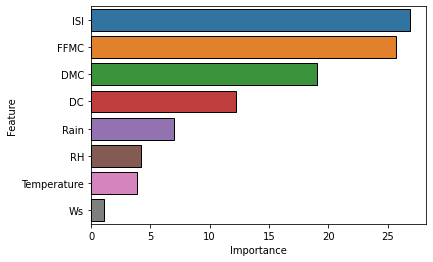

In [154]:
sns.barplot(data=df_features, x='Importance', y='Feature',ec = 'black')